In [2]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
from astropy.io import fits
import fitsio as ft
import os

# ==========================================
# Matplotlib, urlib etc 
import urllib
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from PIL import Image
%matplotlib inline

In [3]:
randoms = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/X_randoms_feat.npy")
randoms_l = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/y_randoms_lab.npy")
burcin = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/X_mat_v4_a.npy")
burcin_l = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/y_lab_v4_a.npy")


In [4]:
burcin_l[-1]

1.0

In [5]:
burcin[-1]

array([ 0.13567279,  0.66271019,  0.45923996,  0.20347023, 18.88780785,
       18.42856789, 18.22509766,  7.23004501,  7.30192346,  6.76399714,
       23.85436821, 23.44228363, 22.99954796, 25.65700531, 25.24581146,
       24.8053894 , 24.96035004, 24.54764175, 24.10549355])

In [6]:
sel = (burcin_l == 1)
burcin = burcin[sel]
burcin_l = burcin_l[sel]

In [7]:
burcin[-1]

array([ 0.13567279,  0.66271019,  0.45923996,  0.20347023, 18.88780785,
       18.42856789, 18.22509766,  7.23004501,  7.30192346,  6.76399714,
       23.85436821, 23.44228363, 22.99954796, 25.65700531, 25.24581146,
       24.8053894 , 24.96035004, 24.54764175, 24.10549355])

In [8]:
#Read in real skim data
realSkim = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')

#Read in training matrices

# Feature matrices
trainDefault = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/X_mat_v4_a.npy")

trainV3 = np.concatenate((np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/X_mat_v4_a.npy"),
                            np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/X_randoms_feat.npy"),
                            np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/X_conf_negative_feat.npy")))
trainV4 = np.concatenate((burcin,randoms))

# Label matrices
labelDefault = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/y_lab_v4_a.npy")

labelV3 = np.concatenate((np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/y_lab_v4_a.npy"),
                             np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/y_randoms_lab.npy"),
                             np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/y_conf_negative_lab.npy")))
labelV4 = np.concatenate((burcin_l,randoms_l))


In [9]:
np.unique(randoms_l)

array([0.])

In [10]:
skim_mu_g = realSkim['MU_MEAN_MODEL_G']
default_mu_g = trainDefault[:,16]
v3_mu_g = trainV3[:,16]
v4_mu_g = trainV4[:,16]

In [11]:
hist_skim, bin_skim = np.histogram(skim_mu_g, density=True,bins=33)
hist_default, bin_default = np.histogram(default_mu_g, density=True,bins=bin_skim[:-1])
hist_v3, bin_v3 = np.histogram(v3_mu_g, density=True,bins=bin_skim[:-1])
hist_v4, bin_v4 = np.histogram(v4_mu_g, density=True,bins=bin_skim[:-1])

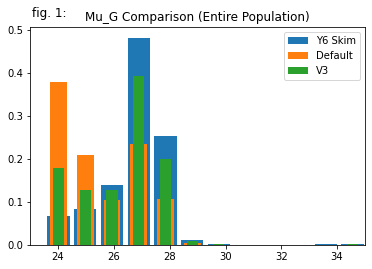

In [12]:
_ = plt.figure(facecolor = 'white')
plt.bar(bin_skim[:-1],hist_skim, label = 'Y6 Skim')
plt.bar(bin_default[:-1],hist_default, label='Default',width = 0.6)
plt.bar(bin_v3[:-1],hist_v3,label = 'V3',width=0.4)
plt.xlim(23,35)
plt.legend()
plt.title("Mu_G Comparison (Entire Population)")
plt.suptitle("fig. 1:", x = 0.17, y = 0.95)
plt.show()

In [13]:
# Generate arrays for positives and negatives

#Default
sel = labelDefault == 1
positivesTrainDefault = trainDefault[sel][:,16]
sel = labelDefault == 0
negativesTrainDefault = trainDefault[sel][:,16]

#V3 classifier
sel = labelV3 == 1
positivesTrainV3 = trainV3[sel][:,16]
sel = labelV3 == 0
negativesTrainV3 = trainV3[sel][:,16]

#V4 classifier
sel = labelV4 == 1
positivesTrainV4 = trainV4[sel][:,16]
sel = labelV4 == 0
negativesTrainV4 = trainV4[sel][:,16]






In [14]:
hist_TrainDefault_art, bins_TrainDefault_art = np.histogram(negativesTrainDefault,density=True,bins=bin_skim[:-1])
hist_TrainV3_art, bins_TrainV3_art = np.histogram(negativesTrainV3,density=True,bins=bin_skim[:-1])
hist_TrainV4_art, bins_TrainV4_art = np.histogram(negativesTrainV4,density=True,bins=bin_skim[:-1])
hist_randoms_art, bins_randoms_art = np.histogram(randoms,density=True,bins=bin_skim[:-1])

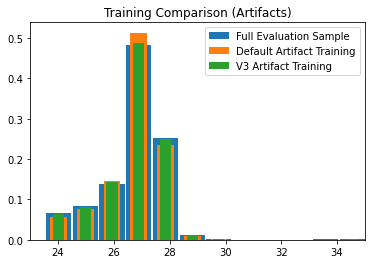

In [15]:
_ = plt.figure(facecolor = 'white')
plt.bar(bin_skim[:-1],hist_skim, label = 'Full Evaluation Sample',width=0.9)
plt.bar(bins_TrainDefault_art[:-1],hist_TrainDefault_art, label = 'Default Artifact Training',width=0.6)
plt.bar(bins_TrainV3_art[:-1],hist_TrainV3_art, label='V3 Artifact Training',width = 0.4)
#plt.bar(bins_TrainV4_art[:-1],hist_TrainV4_art, label='V4 Artifact Training',width = 0.2)



plt.xlim(23,35)
plt.legend()
plt.title("Training Comparison (Artifacts)")
#plt.suptitle("fig. 5:", x = 0.2, y = 0.95)
plt.show()

In [ ]:
randoms_3 = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/X_randoms_v3_feat.npy")
#randoms_l_2 = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/y_randoms_v2_lab.npy")

In [ ]:
hist_randoms3_art, bins_randoms3_art = np.histogram(randoms_3[:,16],density=True,bins=bin_skim[:-1])

In [ ]:
_ = plt.figure(facecolor = 'white')
plt.bar(bin_skim[:-1],hist_skim, label = 'Full Evaluation Sample')

plt.bar(bins_TrainV4_art[:-1],hist_TrainV4_art, label='V4 Artifact Training',width = 0.4)
plt.bar(bins_randoms3_art[:-1],hist_randoms3_art, label='3rd random sample',width = 0.2)


plt.xlim(23,35)
plt.legend()
plt.title("Training Comparison (Artifacts)")
#plt.suptitle("fig. 5:", x = 0.2, y = 0.95)
plt.show()